In [73]:
import warnings # 경고 메시지를 출력하지 않게 하기 위해 improt
warnings.filterwarnings("ignore") # 경고 메시지를 출력하지 않게 한다.
import numpy as np # 수치 계산, 배열 처리를 위해 import 한다.
import pandas as pd # 데이터 분석을 위한 전처리를 위해 import 한다.
import matplotlib as mpl # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 것을 방지하기 위해 import한다.
mpl.rcParams['axes.unicode_minus'] = False # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 것을 방지한다.
import matplotlib.pyplot as plt # 시각화를 하기 위해 import한다.
plt.rcParams["font.family"] = "Pretendard" # matplotlib에서 사용할 글꼴을 지정한다.
plt.rcParams["font.size"] = 12 # matplotlib에서 사용할 글꼴 크기를 지정한다.
import seaborn as sns # 시각화를 하기 위해 import한다. matplotlib 기반으로 만든 시각화 도구
from plotnine import * # R의 ggplot2 패키지를 사용하는 것처럼 만드는 시각화 도구를 import한다.
import missingno as msno # 누락값의 분포를 그래프 형태로 표현한다.
import folium
from mpl_toolkits.mplot3d import Axes3D # 3d 모듈

In [33]:
seoul_metro = pd.read_csv('./data/seoul_metro.csv', encoding='cp949')
seoul_metro

,철도운영기관명,선명,역명,지번주소,도로명주소
0,서울교통공사,1호선,동대문,서울특별시 종로구 창신동 492-1 동대문역(1호선),서울특별시 종로구 종로 지하302(창신동)
1,서울교통공사,1호선,동묘앞,서울특별시 종로구 숭인동 117 동묘앞역(1호선),서울특별시 종로구 종로 359(숭인동)
2,서울교통공사,1호선,서울역,서울특별시 중구 남대문로5가 73-6 서울역(1호선),서울특별시 중구 세종대로 지하2(남대문로 5가)
3,서울교통공사,1호선,시청,서울특별시 중구 정동 5-5 시청역(1호선),서울특별시 중구 세종대로 지하101(정동)
4,서울교통공사,1호선,신설동,서울특별시 동대문구 신설동 76-5 신설동역(1호선),서울특별시 동대문구 왕산로 지하1(신설동)
...,...,...,...,...,...
271,서울교통공사,8호선,신흥,경기도 성남시 수정구 신흥동 2467 신흥역(8호선),경기도 성남시 수정구 산성대로 지하280(신흥동)
272,서울교통공사,8호선,암사,서울특별시 강동구 암사동 501 암사역(8호선),서울특별시 강동구 올림픽로 지하776(암사동)
273,서울교통공사,8호선,잠실(송파구청),서울특별시 송파구 신천동 7-4 잠실역(8호선),서울특별시 송파구 올림픽로 305(신천동)
274,서울교통공사,8호선,장지,서울특별시 송파구 장지동 201-5 장지역(8호선),서울특별시 송파구 송파대로 지하82(장지동)


In [34]:
seoul_metro_hard = pd.read_csv('./data/seoul_metro_hard.csv', encoding='cp949')
seoul_metro_hard['total'] = seoul_metro_hard['5시30분'] + seoul_metro_hard['6시00분'] + seoul_metro_hard['6시30분'] + seoul_metro_hard['7시00분'] + seoul_metro_hard['7시30분'] + seoul_metro_hard['8시00분'] + seoul_metro_hard['8시30분'] + seoul_metro_hard['9시00분'] + seoul_metro_hard['9시30분'] + seoul_metro_hard['10시00분'] + seoul_metro_hard['10시30분'] + seoul_metro_hard['11시00분'] + seoul_metro_hard['11시30분'] + seoul_metro_hard['12시00분'] + seoul_metro_hard['12시30분'] + seoul_metro_hard['13시00분'] + seoul_metro_hard['13시30분'] + seoul_metro_hard['14시00분'] + seoul_metro_hard['14시30분'] + seoul_metro_hard['15시00분'] + seoul_metro_hard['15시30분'] + seoul_metro_hard['16시00분'] + seoul_metro_hard['16시30분'] + seoul_metro_hard['17시00분'] + seoul_metro_hard['17시30분'] + seoul_metro_hard['18시00분'] + seoul_metro_hard['18시30분'] + seoul_metro_hard['19시00분'] + seoul_metro_hard['19시30분'] + seoul_metro_hard['20시00분'] + seoul_metro_hard['20시30분'] + seoul_metro_hard['21시00분'] + seoul_metro_hard['21시30분'] + seoul_metro_hard['22시00분'] + seoul_metro_hard['22시30분'] + seoul_metro_hard['23시00분'] + seoul_metro_hard['23시30분']
seoul_metro_hard

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,total
0,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,...,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1,828.9
1,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,...,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3,941.3
2,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,...,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7,809.1
3,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,...,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1,871.8
4,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,...,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,3.1,...,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5,144.7
1702,일요일,8,2827,모란,상선,1.6,0.9,2.5,1.3,1.2,...,4.2,3.7,4.8,4.1,4.0,4.0,4.2,2.7,1.8,134.7
1703,일요일,8,2827,모란,하선,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1704,전체,1,152,종각,상선,16.8,27.0,25.0,28.1,35.0,...,52.3,49.8,45.7,55.5,48.0,51.8,51.9,38.8,39.9,2129.7


In [106]:
seoul_metro_up = seoul_metro_hard[seoul_metro_hard['구분'] == '상선']
seoul_metro_down = seoul_metro_hard[seoul_metro_hard['구분'] == '하선']
seoul_metro_up

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,total
0,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,...,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1,828.9
2,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,...,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7,809.1
4,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,...,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8,801.0
6,평일,1,153,종로3가,상선,4.8,9.8,9.0,12.9,20.4,...,22.2,21.0,18.9,26.1,18.3,22.8,29.0,18.2,16.6,868.8
8,평일,1,154,종로5가,상선,4.3,7.9,7.4,9.9,15.6,...,22.8,21.5,21.9,27.8,22.4,20.8,29.8,18.7,16.7,830.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,일요일,8,2824,단대오거리,상선,5.2,2.9,4.3,4.8,4.4,...,5.3,4.6,4.8,4.5,3.5,4.2,3.2,2.7,1.3,249.0
1698,일요일,8,2825,신흥,상선,3.0,2.1,3.6,3.1,2.7,...,4.3,4.4,4.6,5.1,3.8,4.1,3.7,3.0,1.4,184.0
1700,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,...,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4,155.1
1702,일요일,8,2827,모란,상선,1.6,0.9,2.5,1.3,1.2,...,4.2,3.7,4.8,4.1,4.0,4.0,4.2,2.7,1.8,134.7


In [108]:
seoul_metro_up_melt = pd.melt(seoul_metro_up, id_vars=['5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분'], value_vars='역명', value_name='역명')
seoul_metro_down_melt = pd.melt(seoul_metro_down, id_vars=['5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분'], value_vars='역명', value_name='역명')
# seoul_metro_down_melt.to_csv('./output/seoul_metro_down_melt.csv')

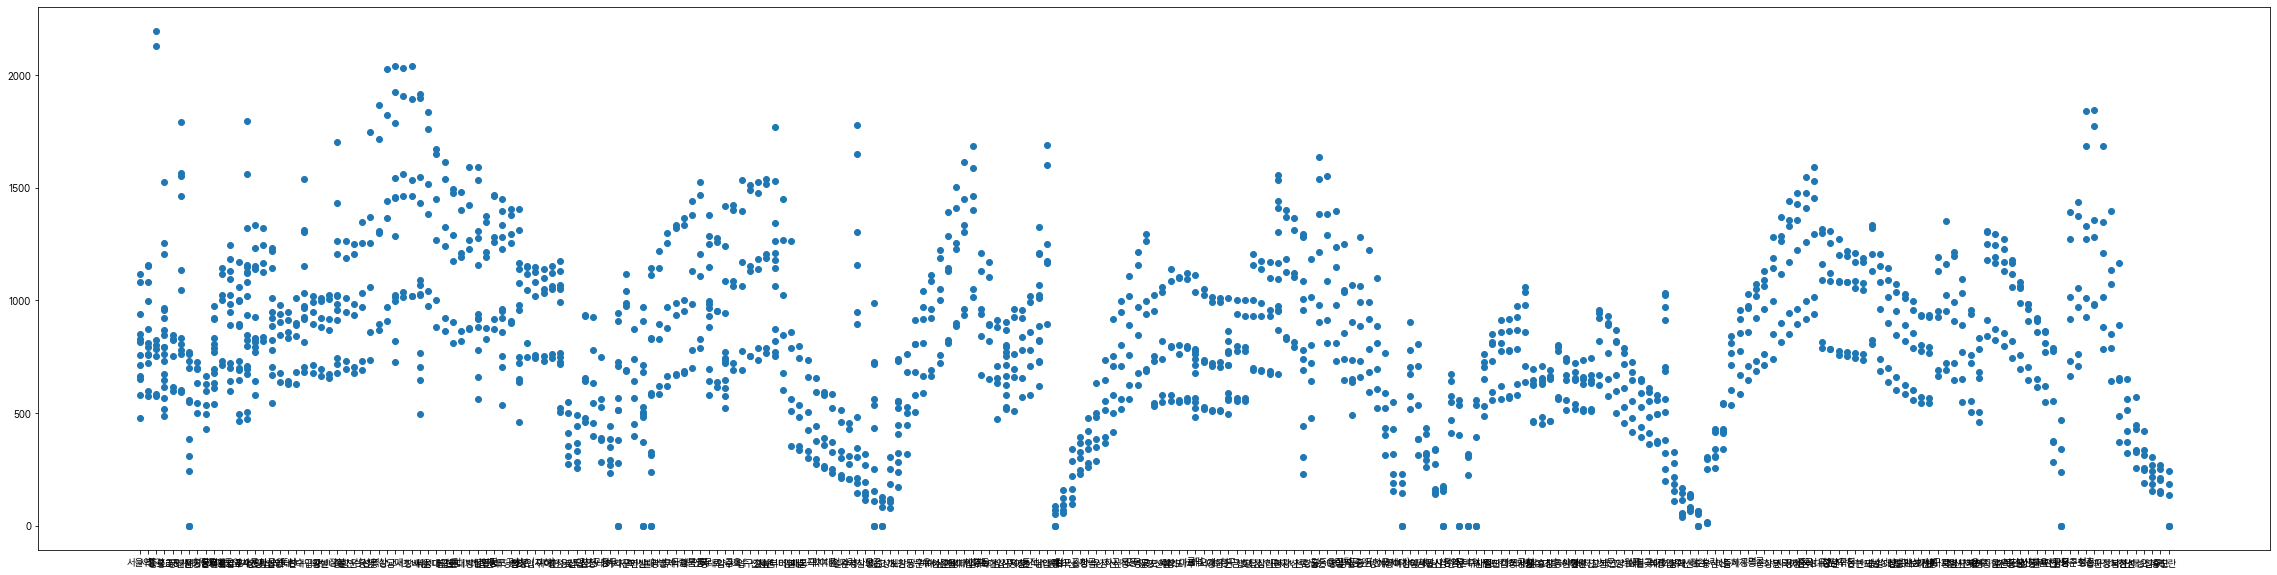

In [38]:
plt.figure(figsize=(40, 10))
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['total'])
plt.legend
plt.show()

<AxesSubplot:xlabel='역명'>

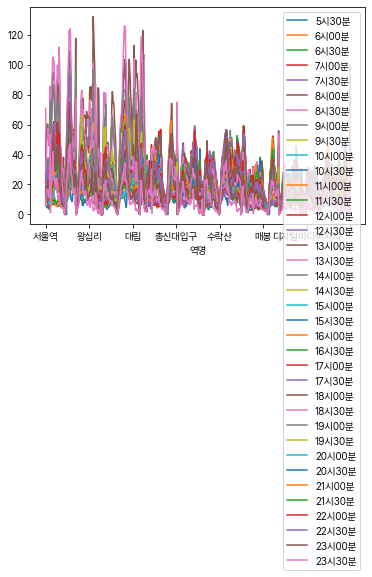

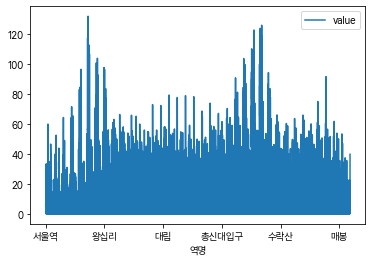

In [39]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# ax = fig.add_subplot(projection='3d')

seoul_metro_up_melt.plot(x='역명')
seoul_metro_up_melt2.plot(x='역명')

# ax.plot_surface(seoul_metro_up_melt2['혼잡도'], seoul_metro_up_melt2['시각'],seoul_metro_up_melt2)

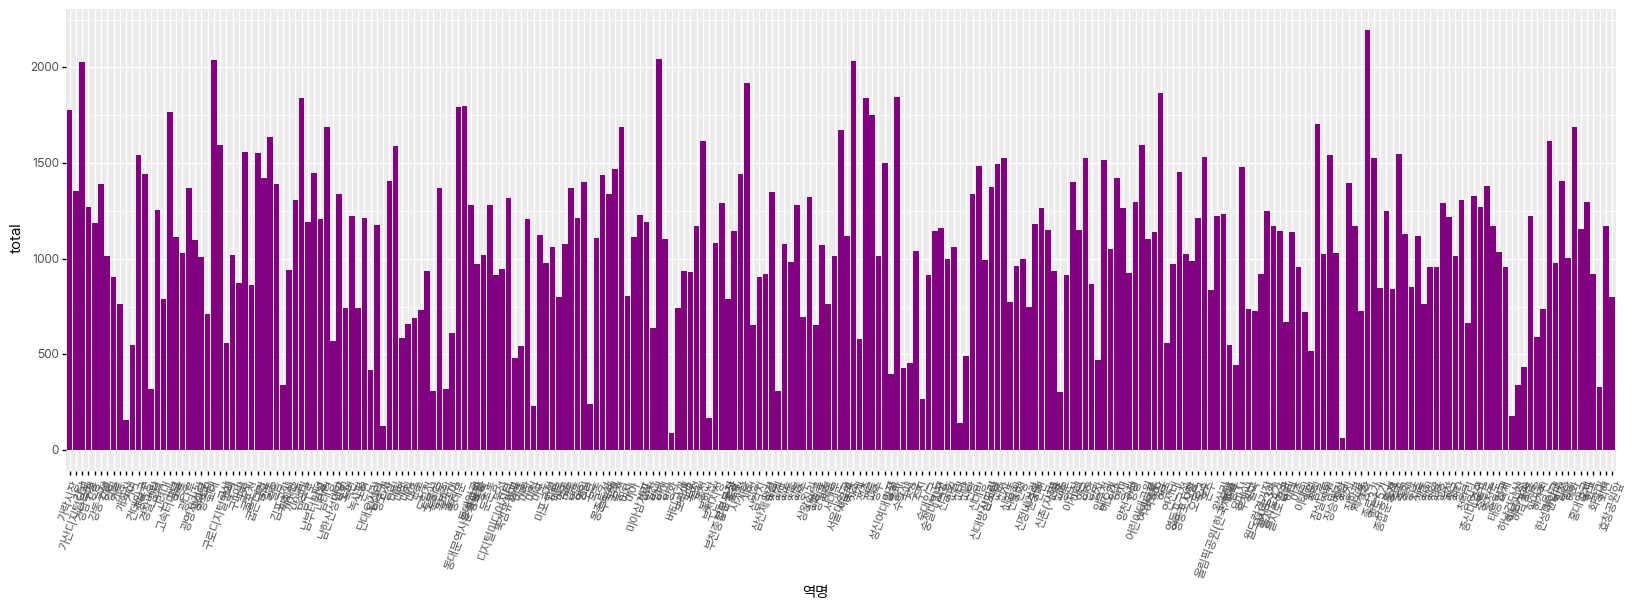

<ggplot: (162809554780)>

In [40]:
(
    ggplot(seoul_metro_hard, aes(x='역명', y='total'))
        + geom_bar(stat='identity', position='dodge', fill='purple')
        
        + theme(text=element_text(family='Pretendard'), figure_size=(20, 6), axis_text_x=element_text(rotation=70))
)

In [41]:
seoul_metro_hard.columns

Index(['조사일자', '호선', '역번호', '역명', '구분', '5시30분', '6시00분', '6시30분', '7시00분',
       '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분',
       '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분',
       '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분',
       '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분',
       '21시30분', '22시00분', '22시30분', '23시00분', '23시30분', 'total'],
      dtype='object')

In [132]:
z = pd.read_csv('./output/seoul_metro_up_melt.csv',encoding='cp949')

x = z['역명']
y = z[['5시30분', '6시00분', '6시30분', '7시00분','7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분','11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분','14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분','18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분','21시30분', '22시00분', '22시30분', '23시00분', '23시30분']]
z = z.set_index('역명')
z[z > 70].count()

5시30분      0
6시00분      0
6시30분      0
7시00분      1
7시30분      9
8시00분     50
8시30분     20
9시00분     11
9시30분      0
10시00분     0
10시30분     0
11시00분     0
11시30분     0
12시00분     0
12시30분     0
13시00분     0
13시30분     0
14시00분     0
14시30분     0
15시00분     0
15시30분     0
16시00분     0
16시30분     1
17시00분    14
17시30분    34
18시00분    52
18시30분    62
19시00분    28
19시30분     0
20시00분     0
20시30분     0
21시00분     0
21시30분     0
22시00분     3
22시30분     6
23시00분     0
23시30분     0
dtype: int64

In [135]:
z2 = pd.read_csv('./output/seoul_metro_down_melt.csv',encoding='cp949')

x2 = z2['역명']
y2 = z2[['5시30분', '6시00분', '6시30분', '7시00분','7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분','11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분','14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분','18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분','21시30분', '22시00분', '22시30분', '23시00분', '23시30분']]
z2 = z2.set_index('역명')
z2
z2[z2 > 70].count()

5시30분      5
6시00분      0
6시30분      0
7시00분      8
7시30분     36
8시00분     70
8시30분     52
9시00분     29
9시30분      4
10시00분     0
10시30분     0
11시00분     0
11시30분     0
12시00분     0
12시30분     1
13시00분     0
13시30분     0
14시00분     1
14시30분     1
15시00분     1
15시30분     1
16시00분     1
16시30분     1
17시00분     1
17시30분     7
18시00분    24
18시30분    38
19시00분     7
19시30분     1
20시00분     0
20시30분     0
21시00분     0
21시30분     0
22시00분     0
22시30분     0
23시00분     0
23시30분     0
dtype: int64

In [122]:
up = seoul_metro_hard[(seoul_metro_hard['역명'] == '종각') & (seoul_metro_hard['조사일자'] == '전체') & (seoul_metro_hard['구분'] == '상선')]
down = seoul_metro_hard[(seoul_metro_hard['역명'] == '종각') & (seoul_metro_hard['조사일자'] == '전체') & (seoul_metro_hard['구분'] == '하선')]
up = pd.melt(up, value_vars=['5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분'], value_name='혼잡도', var_name='시각')
down = pd.melt(down, value_vars=['5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분'], value_name='혼잡도', var_name='시각')

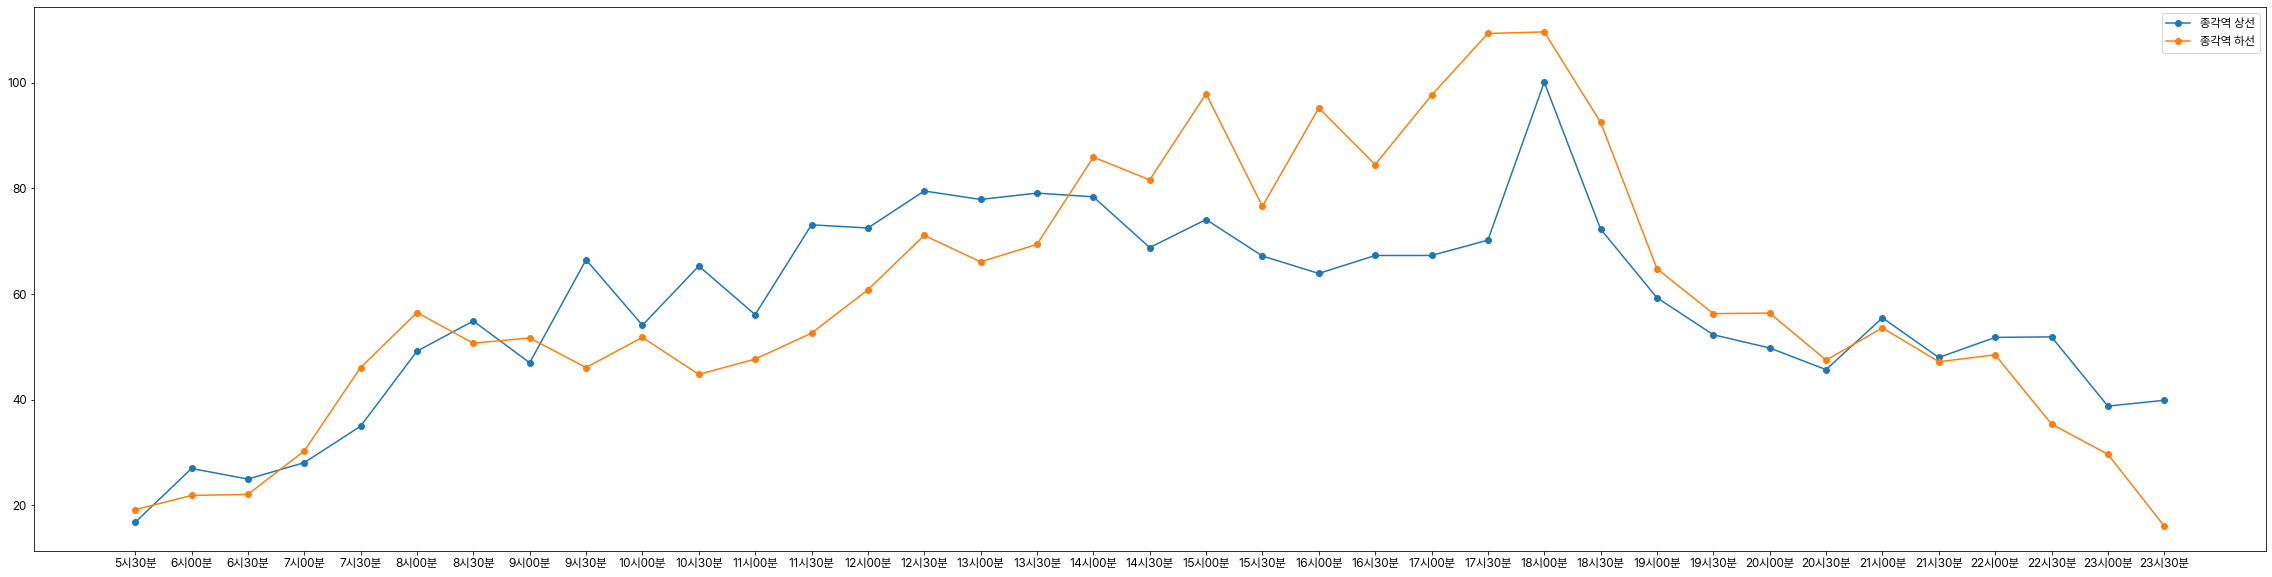

In [121]:
plt.figure(figsize=(40, 10))
plt.plot(up['시각'], up['혼잡도'], marker='o')
plt.plot(down['시각'], down['혼잡도'], marker='o')

plt.legend(['종각역 상선', '종각역 하선'])

plt.show()

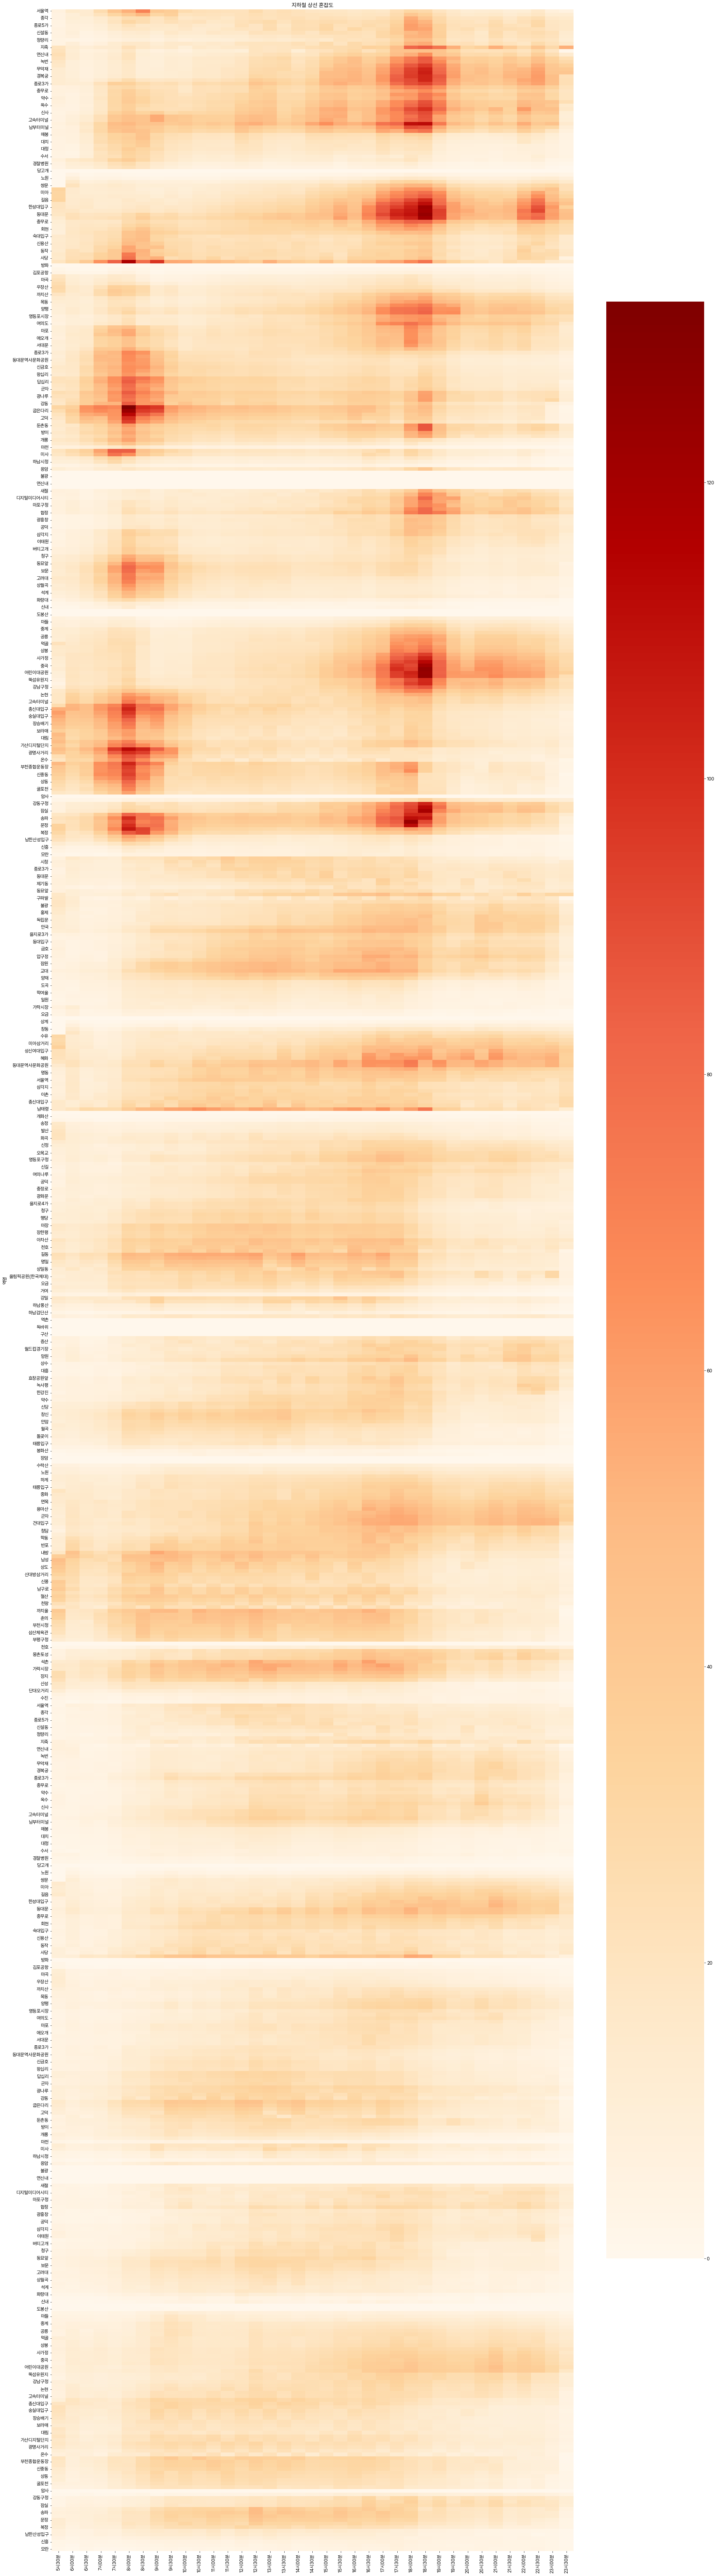

In [117]:
plt.figure(figsize=(30, 120))
sns.heatmap(data = z, cmap = 'OrRd', annot=False)
plt.title('지하철 상선 혼잡도')
plt.show()

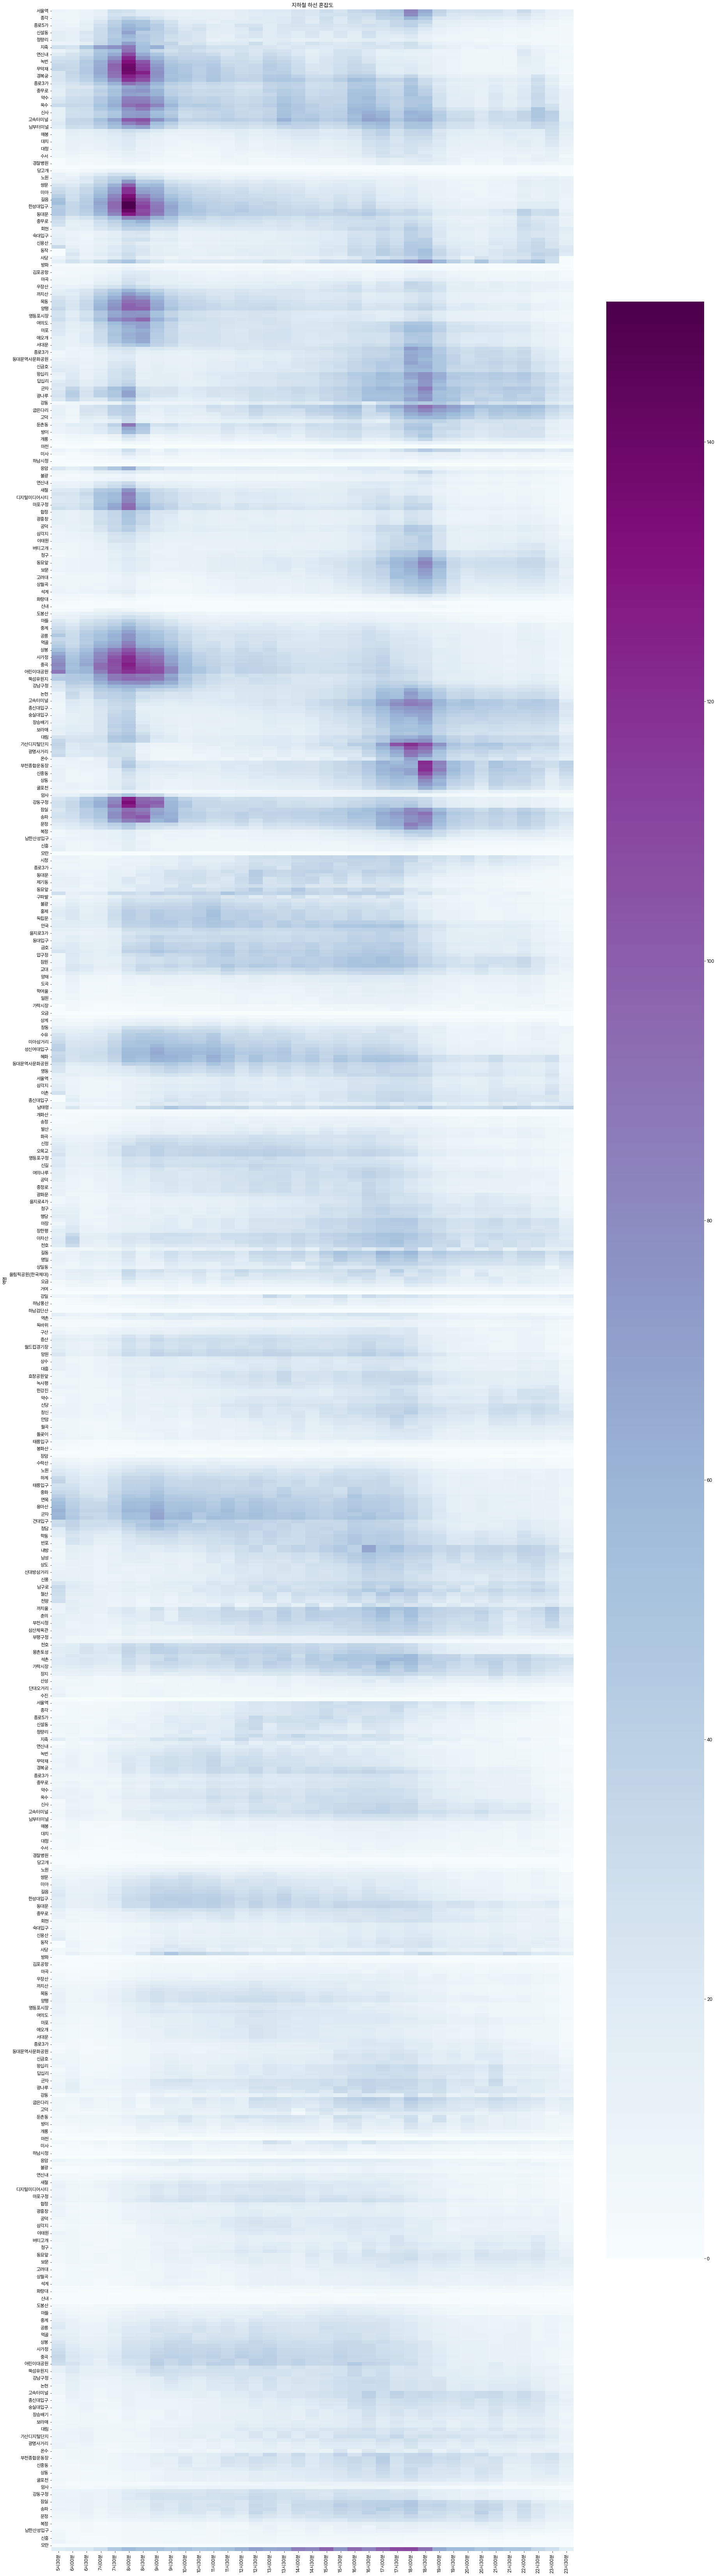

In [116]:
plt.figure(figsize=(30, 120))
sns.heatmap(data = z2, cmap = 'BuPu', annot=False)

plt.title('지하철 하선 혼잡도')
plt.show()

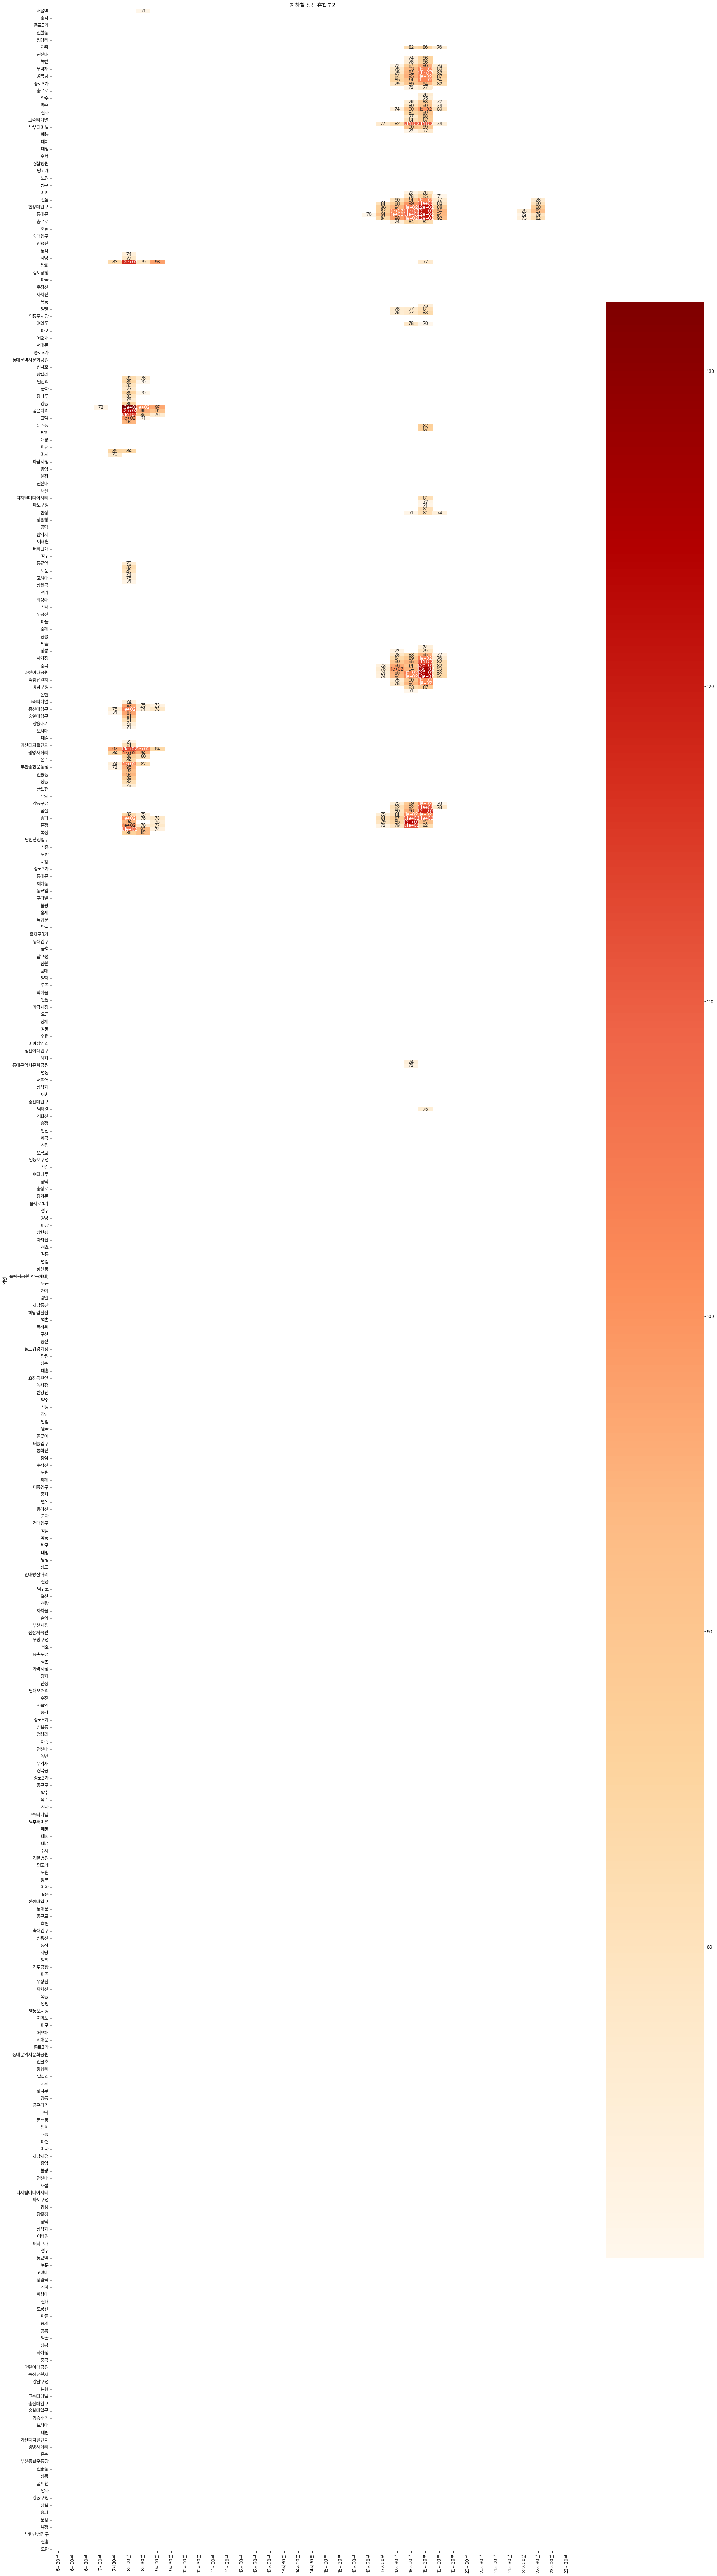

In [139]:
plt.figure(figsize=(30, 120))
sns.heatmap(data = z[z>70], cmap = 'OrRd', annot=True)
plt.title('지하철 상선 혼잡도2')
plt.show()

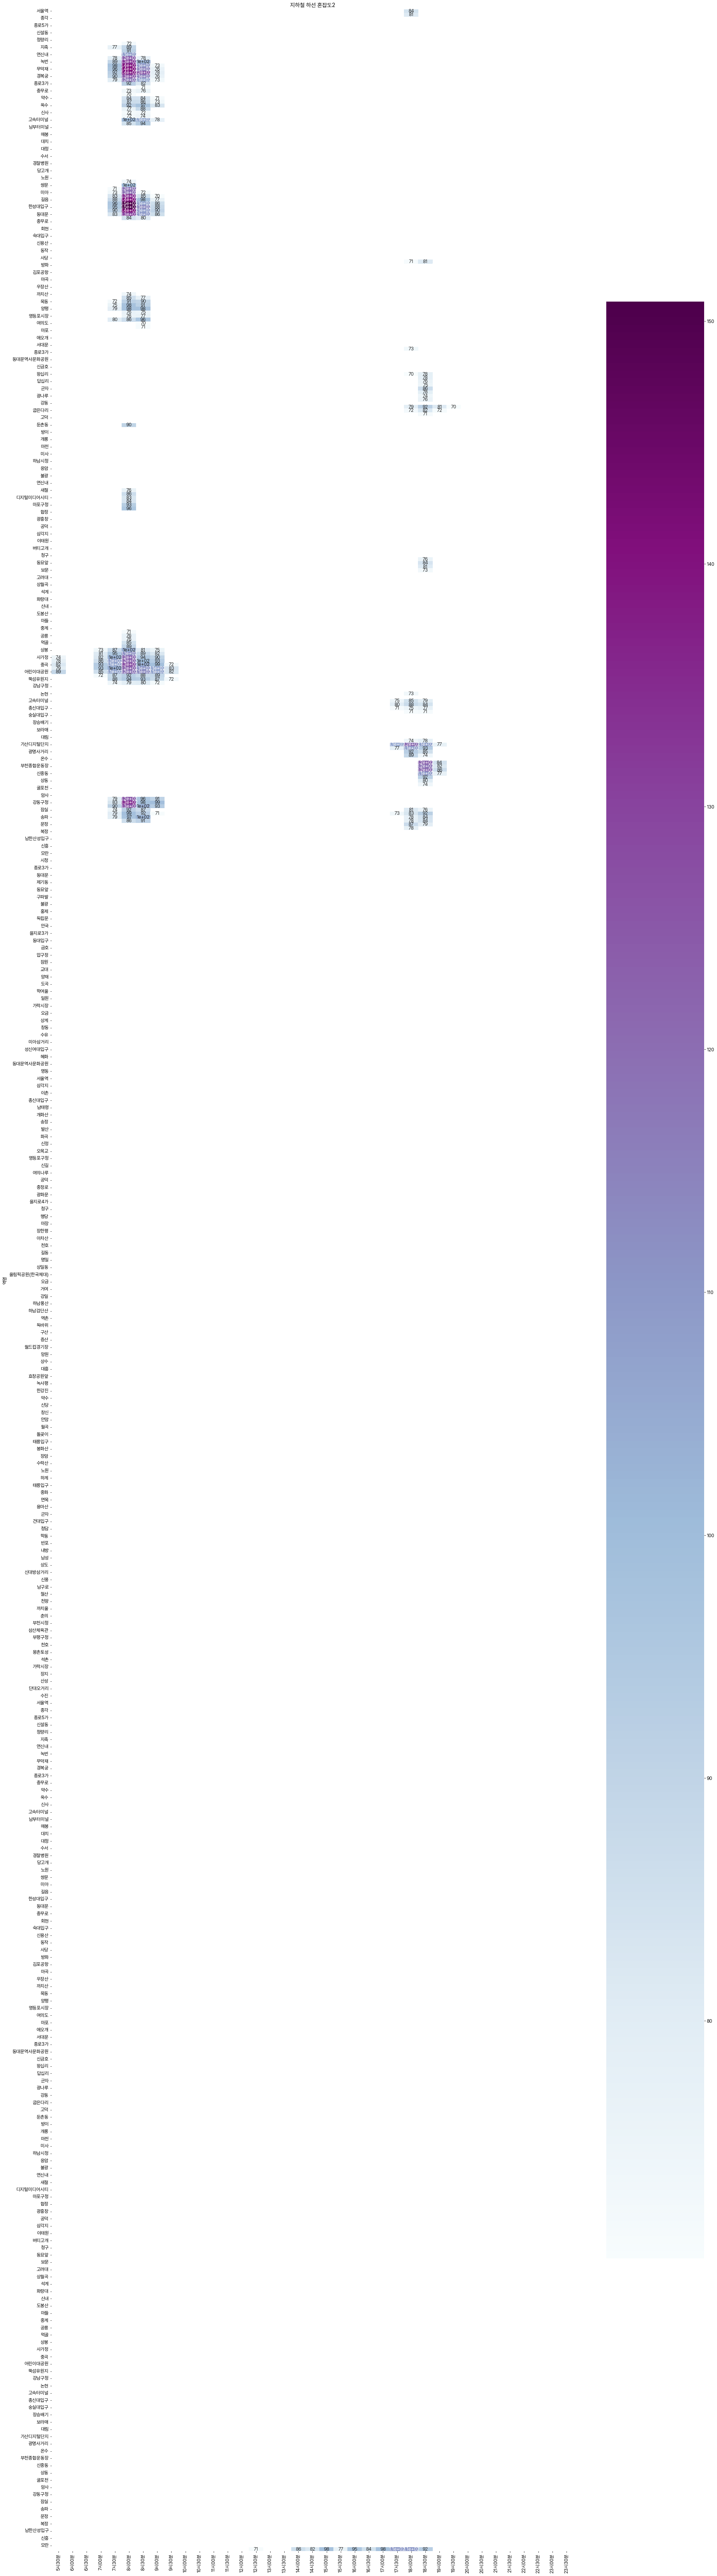

In [140]:
plt.figure(figsize=(30, 120))
sns.heatmap(data = z2[z2>70], cmap = 'BuPu', annot=True)
plt.title('지하철 하선 혼잡도2')
plt.show()